<b>Introduction</b><br><br>
In this assignment you will develop an Artificial Neural Network (ANN) for the recognition of handwritten digits. In order to understand how neural networks work, you will first solve this task using elementary numpy operations. Subsequently, you will see that TensorFlow allows to implement the same model much simpler. Finally, you are asked to try different versions of the model.<br><br>
When solving this homework, you are expected to work through this Jupyter Notebook, i.e., to extend the code in the cells and to execute them. <br><br>
<b>Please note that in most cases, the implementation tasks can be solved within a few lines of Python code if you use appropriate numpy functions. We encourage you to do so.</b>

<b>Set up the workspace</b><br><br>
Let us start with importing the necessary libraries and downloading the data into the work space. 
In order to do that, please execute the cells below.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy.random

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The dataset contains images of hand written digits. Each image 
has the size of 28x28 and is stored as a vector of 28*28=784 real values. 
Next, we want to plot some of the images. <br> (If you do not want to work in this Jupyter notebook, you can download the data from here: <br> http://yann.lecun.com/exdb/mnist/ )

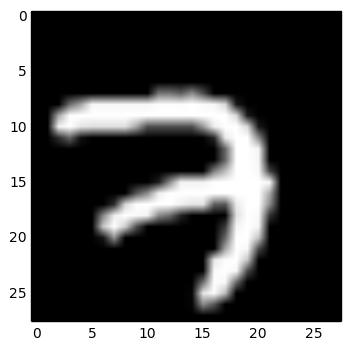

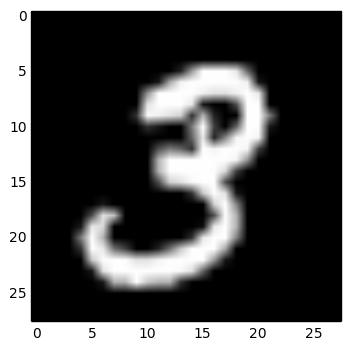

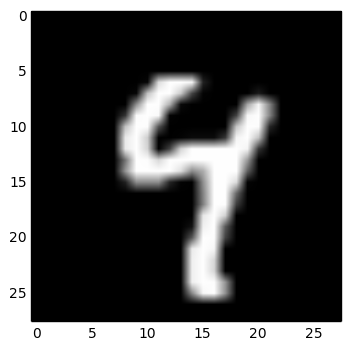

In [4]:
for i in range(3):
    plt.imshow(np.reshape(mnist.train.images[i], (28,28)), cmap='Greys_r')  
    plt.show()

<b>ANN with NumPy</b><br><br>
Next, we will train and evaluate an ANN using elementary NumPy operations. First, you are asked to <b>implement a function called <i>sigmoid</i> that takes an iterable (i.e., numpy array, list, etc.) as an input an outputs a numpy array containing the value of the sigmoid function for each element of the input list.</b> <br>
Please note that calculating the sigmoid of large positive/negative numbers according to its definition may lead to numerical issues, so in case if the sigmoid of a number is calcuated which is larger than 100 or less than -100, you should simply return 1 or 0 respectively. 

In [5]:
def sigmoid(values):
    tmp = np.zeros(len(values))
    for i in range(0, len(values)):
        if (values[i] > 100):
            x = 1
        elif (values[i] < -100):
            x = -1
        else:
            x = (1.0/(1+math.exp(-values[i])))

        np.put(tmp, i,  x)

    return tmp

Let us test your sigmoid function. If your implementation is correct, the output of the cell below is as follows: <br> 
<pre>
[  4.53978687e-05   2.68941421e-01   5.00000000e-01   7.31058579e-01   9.99954602e-01]
</pre>

In [6]:
print(sigmoid( [-10,-1,0,1,10] ))

[  4.53978687e-05   2.68941421e-01   5.00000000e-01   7.31058579e-01
   9.99954602e-01]


Next, you are asked to <b>implement a function which calculates the activations of the neurons 
of the hidden layer and the output layer</b>. The function takes the following inputs: 
<ul>
<li> w1 = a numpy array containing the weights of the connections between input and hidden layer,</li>
<li> w2 = a numpy array containing the weights of the connections between hidden and output layer,</li>
<li> an input vector fed into the neural network.
</ul><br>
Your function should return a pair of two numpy arrays, the first one containing the activations of the hidden layer, and the second one containing the activations of the output layer.<br><br>
Both hidden units as well as output units shall use your <b>sigmoid</b> as activation function.<br><br>
In order to simplify notations, please note that we will incorporate bias weights into the weight matrices as follows: each row of the matrix corresponds to the weights of a unit, and the first column in each row contains the bias weight of the unit. That is:
<ul>
<li>W[i,j] = the bias weight of the <i>i</i>-th unit if <i>j</i> = 0,</li>
<li>W[i,j] = the weight of the <i>j</i>-th input of <i>i</i>-th unit (here, the inputs of a unit are numbered as 1,2,...).</li>
</ul><br>
Please note that, in general, it is a good idea to use vectorized implementations both for the clarity of the code and for computational efficiency (optimized numeric algebra libraries execute matrix operations on GPU). Therefore, in order to train/learn this programming style, as far as possible, please try to use matrix operations from the numpy library. <br><br><b>Hint:</b> When using matrix operations, you are welcome to concatenate a dummy variable having a constant value of 1 for all the instances to your original vectors and the activations. This will allow you to handle bias weights simply together with the other weights.

In [7]:
def network_activations(w1,w2,x):
    x = np.insert(x, 0, 1.0)
    net1 = np.dot(w1, x.transpose())
    a1 = sigmoid(net1)

    a1 = np.insert(a1, 0, 1.0)
    net2 = np.dot(w2, a1.transpose())
    a2 = sigmoid(net2)

    a1 = np.delete(a1, 0)

    return (a1,a2)

Next we will test your implementation on a simple example. The network takes a 3-dimensional 
vector (0.5, 1.2, 0.8) as input, it has two hidden units and one output unit. If your implementation is correct, the output of the cell below is as follows:<br>
<pre>
(array([ 0.63413559,  0.24232036]), array([ 0.58525207]))
</pre>

In [8]:
x = np.array([0.5,1.2,0.8])

# Note that the first column contains bias weights therefore, the number of columns in
# the w1 matrix is one more than the length of the vector, and the number of columns in 
# the w2 matrix is one more than the number of hidden units
w1 = np.array( [ [ 0.5, 0.1, -0.2, 0.3 ], \
                 [ -1.2, 0.2, 0.5, -0.8], ] )
w2 = np.array( [ [ 0.1, 0.5, -0.3 ] ])
print(network_activations(w1,w2,x))

(array([ 0.63413559,  0.24232036]), array([ 0.58525207]))


In order to classify handwritten digits, we will use one output node for each class. That is: as we are given 10 different digits (0, 1, ..., 9), we will have 10 output nodes. Idealistically, in case if the image corresponds to a "0", the first output node has high activation, whereas the other output nodes have low activations. Similarly, if the image shows  a "1", the second output node will have high activation, and the others will have low activations, and so on... 
<br>
Therefore, in order to recognize a digit with your neural network, you will have to select which output node has the highest activation.<br>
Based on your previous codes, <b>you are asked to implement a function that gives which digit is predicted by the neural network</b>. The function should have the following inputs:
<ul>
<li>two weight matrices w1, w2 corresponding to the connection weights and biases of the hidden layer and output layer just like in the previous task, and
<li>an input vector for which we want to determine which class it belongs to.
</ul><br>
The output of the function should be a single number corresponding to the recognized digit. 

In [9]:
def predict(w1,w2,x):
    (a1, a2) = network_activations(w1, w2, x)
    num = 0
    max = a2.item(0)
    for i in range(0, a2.size):
        if(a2.item(i) > max):
            num = i
            max = a2.item(i)
    return num

Next, we will test your implementation on a simple example. If your implementation is correct, the output of the cell below should be: 
<pre>
0
1
</pre>

In [10]:
x1 = np.array([-0.5,1.2,-0.5])
x2 = np.array([0.5,0.3,0.2])

# Note that the first column contains bias weights therefore, the number of columns in
# the w1 matrix is one more than the length of the vector, and the number of columns in 
# the w2 matrix is one more than the number of hidden units
w1 = np.array( [ [  0.1,  0.1, -0.2,  0.3 ], \
                 [ -0.1,  0.2,  0.5, -0.8 ], ] )
w2 = np.array( [ [  0.1,  0.5, -0.3 ], \
                 [ -0.1, -0.2,  0.7 ] ])
print(predict(w1,w2,x1))
print(predict(w1,w2,x2))

1
0


In order to use neural network for character recognition, we need to determine the weights. Next, we will follow the approach that was shown in the lecture on the 16th of December. That is: we will optimize the squared loss function using gradient descent. We will calculate the gradients with backpropagation. Please note that the loss function sums over training instances, therefore, one can simply calculate the gradients for each instance separately and sum up those gradients to get the gradients of the loss function. This is what we will do. <br><b> Now, you are just asked to implement a code that calculates the gradients using backpropagation for a single training instance.</b> Before beginning with the implementation, you are welcome to study the lecture slides about backpropagation. The function you will implement next will have the following inputs:
<ul>
<li>the current weight matrices w1 and w2,
<li>a training instance x,
<li>y = the class label of the training example in binary representation. <br>For example: if the class of an image is "0" then the binary label is the vector (1,0,0,0,0,0,0,0,0,0). <br>If the class of an image is "1" then the binary label is the vector (0,1,0,0,0,0,0,0,0,0), and so on.
</ul><br>
The output of the function should be the gradient vectors (for both w1 and w2) in case of the training instance x. 

In [11]:
def gradient_for_an_instance(w1,w2,x,y):
    
    return (grad_w1, grad_w2)

By executing the next cell, we initialize network parameters and train the network using your code from the previous cell. Please note that it may take some time...

In [12]:
MINIBATCH_SIZE   = 100
NUM_HIDDEN_UNITS = 100
NUM_ATTRIBUTES   = len(mnist.train.images[0])
NUM_CLASSES      = len(mnist.train.labels[0])
np.random.seed(42)
w1 = (np.random.random((NUM_HIDDEN_UNITS,NUM_ATTRIBUTES+1)))-0.5
w2 = (np.random.random((NUM_CLASSES,NUM_HIDDEN_UNITS+1)))-0.5
eps = 0.5

for iteration in range(10000):
    grad_w1all = np.zeros((NUM_HIDDEN_UNITS,NUM_ATTRIBUTES+1))
    grad_w2all = np.zeros((NUM_CLASSES,NUM_HIDDEN_UNITS+1))
    train_images, labels = mnist.train.next_batch(MINIBATCH_SIZE )
    for instance in range(MINIBATCH_SIZE):
        grad_w1,grad_w2 = gradient_for_an_instance( \
            w1,w2,train_images[instance],labels[instance])
        grad_w1all += grad_w1/MINIBATCH_SIZE
        grad_w2all += grad_w2/MINIBATCH_SIZE
    w1 += eps*grad_w1all
    w2 += eps*grad_w2all
    
    if iteration%100==0:
        print(iteration, " out of 10000 finished")

NameError: global name 'grad_w1' is not defined

Finally, by executing the cell below, calculate the accuracy of your ANN on the test data. It should be around 0.8843 .

In [2]:
correct = 0
for instance in range(len(mnist.test.images)):
    if np.argmax(mnist.test.labels[instance]) == predict(w1,w2,mnist.test.images[instance]):
        correct += 1
print(correct/len(mnist.test.images))

NameError: name 'mnist' is not defined

<b>ANN with TensorFlow</b>

Next, we will solve the same task in TensorFlow, i.e., we will train an evaluate a similar neural network for the recognition of handwritten digits. We will use the same network architecture, loss function and activation function as before. <br><br>
First, we will create the graph describing the computations. Subsequently, we will launch a TensorFlow session in order to actually perform the computations.
<br><br>
We begin the construction of the graph by defining some placeholders for training instances and their class labels.
<br><br>
You will not need to modify the code in the cells in this section, however, please study the code because in the next section you will be asked to create a different neural network with TensorFlow.

In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

NameError: name 'tf' is not defined

In order to store the model parameters (i.e., weights and bias weights), we define variables containing random tensors initially. As opposed to implementing neural networks with NumPy, we will now define separate variables for edge weights and bias weights. 

In [4]:
def weight_variable(shape):
    initial = tf.random_uniform(shape, minval=-0.5, maxval=0.5)
    return tf.Variable(initial)

# One hidden layer with 100 neurons
NUM_HIDDEN_NEURONS = 100

W1 = weight_variable([784,NUM_HIDDEN_NEURONS]) 
# weights of the connections between input layer and hidden layer

W2 = weight_variable([NUM_HIDDEN_NEURONS, NUM_HIDDEN_NEURONS])
W3 = weight_variable([NUM_HIDDEN_NEURONS,NUM_HIDDEN_NEURONS])
W4 = weight_variable([NUM_HIDDEN_NEURONS,10])

# weights of the connections between hidden layer and output layer

b1 = weight_variable([NUM_HIDDEN_NEURONS])
# bias weights of the hidden layer
b2 = weight_variable([NUM_HIDDEN_NEURONS])
b3 = weight_variable([NUM_HIDDEN_NEURONS])
b4 = weight_variable([10])
# bias weights of the output layer

NameError: global name 'tf' is not defined

Next, we define the computations used to calculate the activations of the network.

In [ ]:
a1 = tf.sigmoid(tf.matmul(x,W1) +b1)  # activations of the hidden layer
a2 = tf.sigmoid(tf.matmul(a1,W2)+b2)  # activations of the output layer

Next, we define the loss function

In [ ]:
loss = tf.reduce_mean(tf.square(y - a2))

Instead of calculating gradients and implementing gradient descent, we only need to specify which function we want to optimize. Nodes computing the gradients and performing the optimization will be added automatically to the computation graph.

In [ ]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

The graph describing computations is ready. Next, we will launch a TensorFlow session in order to execute the graph. We will perform training in mini batches by executing the graph on different subsets of the training data.

In [ ]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for i in range(10000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1]})

Calculate the accuracy of predictions on the test data

In [ ]:
correct_prediction = tf.equal(tf.argmax(a2,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

<b>Create a deep(er) neural network with TensorFlow</b><br><br>
Using TensorFlow, you are asked to create a neural network with 3 hidden layers, each one containing 100 units. Additionally, apply the following modifications as well:
<br>
1. Use cross-entropy as loss function:
<pre>
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(a_out, y))
</pre>
where a_out denotes the activations of the output layer.
<br>
<br>
2. Initial patameters of the model should be sampled from a truncated normal distribution with standard deviation of 0.1:
<pre>
tf.truncated_normal(shape, stddev=0.1)
</pre>
3. Use  100 000 (10-times more than before) iterations with minibatch size of 100 to train the model.

<b>Group-number dependent tasks</b>

The resulting neural network gives much higher accuracy then the previous one. In order to examine how different design choices affect accuracy, depending on your group number, perform one of the following tasks.

- If your group number modulo 5 is equal to 0, examine the effect of initialization: repeat the previous experiment with initializing the model parameters with random values from different distributions. In particular, use different random tensors (see: https://www.tensorflow.org/api_docs/python/constant_op/) as inital values of the model parameters. 
- If your group number modulo 5 is equal to 1, examine the effect of loss function: repeat the previous experiment with squared loss instead of cross-entropy.
- If your group number modulo 5 is equal to 2, examine how the performance depends on the number of minibatch iterations. In particular: measure the accuracy of the model after each minibatch iteration.
- If your group number modulo 5 is equal to 3, examine how the number of hidden layers affect accuracy: try models with 2 and 4 hidden layers. Please take into consideration that, in order to train models with more hidden layers, more training iterations may be necessary. 
- If your group number modulo 5 is equal to 4, examine how the performance depends on the number of neurons in the hidden layers: try at least 5 models with different number of neurons in the hidden layer. 